## Processi ARMA

La classe dei processi ARMA comprende sia i processi AR che i processi MA come caso particolare. Un processo $ARMA(p,q)$ è infatti definito da:
$$A(L) y_t = C(L) \epsilon_t$$
dove $p$ è l'ordine del polinomio $A(L)$ e $q$ è l'ordine del polinomio $C(L)$.

...

### Previsione

Data la disponibilità della serie temporale fino al tempo $T$, ci proponiamo ora di prevedere il fenomeno $k$ periodi in avanti. Il set informativo a cui facciamo riferimento è denotato con $\mathcal{F}_T= \{ y_1, y_2, \dots y_{T-1}, y_T \}$. Sfrutteremo il risultato fondamentale secondo il quale il previsore ottimale di $y_{T+k}$ è il suo valore atteso condizionato all'informazione disponibile al tempo $T$:
$$\tilde y_{T+k \vert T} = \mathbb{E} [y_{T+k} \vert \mathcal{F}_T] $$


#### Previsione da un modello AR(1)

$$ y_t = \alpha t_{t-1} + \epsilon_t$$

$$
\begin{split}
\tilde y_{T+1 \vert T} &= \mathbb{E} \left[ y_{T+1} \vert \mathcal{F}_T \right]  \\
&= \alpha \mathbb{E} [y_T \vert \mathcal{F}_T] + \mathbb{E} [\epsilon_{T+1} \vert \mathcal{F}_T] \\
&= \alpha y_T
\end{split}
$$

$$
\begin{split}
\tilde y_{T+2 \vert T} &= \mathbb{E} \left[ y_{T+2} \vert \mathcal{F}_T \right]  \\
&= \alpha \mathbb{E} [y_{T+1} \vert \mathcal{F}_T] + \mathbb{E} [\epsilon_{T+2} \vert \mathcal{F}_T] \\
&= \alpha \mathbb{E} [ (\alpha y_T + \epsilon_{T+1}) \vert \mathcal{F}_T] + \mathbb{E} [\epsilon_{T+2} \vert \mathcal{F}_T] \\
&= \alpha^2 y_T
\end{split}
$$

In generale, le previsioni seguono la formula ricorsiva:
$$
\tilde y_{T+k \vert T} = \alpha \tilde y_{T+k -1 \vert T}
$$
con valore iniziale $(k=0)$ pari all'ultimo valore osservato $y_T$. Nei termini di quest'ultimo possiamo scrivere:
$$
\tilde  y_{T+k \vert T} = \alpha^k y_T
$$

Calcoliamo ora la varianza dell'errore di previsione:

$$
\begin{split}
V \left( \tilde y_{T+1 \vert T}  \right) &= \mathbb{E} \left[  (y_{T+1} - \tilde y_{T+1 \vert T} )^2   \right] \\
&= \mathbb{E} \left[  ( \alpha y_T + \epsilon_{T+1} -\alpha y_T          )^2   \right] \\
&= \sigma^2
\end{split}
$$

$$
\begin{split}
V \left( \tilde y_{T+2 \vert T}  \right) &= \mathbb{E} \left[  (y_{T+2} - \tilde y_{T+2 \vert T} )^2   \right] \\
&= \mathbb{E} \left[  ( \alpha^2 y_T + \alpha \epsilon_{T+1} + \epsilon_{T+2} -\alpha^2 y_T          )^2   \right] \\
&= \sigma^2(1 + \alpha^2)
\end{split}
$$

In generale

$$
\begin{split}
V \left( \tilde y_{T+k \vert T}  \right) &= \mathbb{E} \left[  (y_{T+k} - \tilde y_{T+k \vert T} )^2   \right] \\
&= \sigma^2(1 + \alpha^2 + \alpha^4 + \dots + \alpha^{2(k-1)})
\end{split}
$$

ricordando che
$$
\sum\limits_{i=0}^n x^{2i} = \frac{1-x^{2(n+1)}}{1-x^2}
$$

otteniamo infine 
$$
V \left( \tilde y_{T+k \vert T}  \right) = \sigma^2  \frac{1-\alpha^{2k}}{1-\alpha^2}
$$


### Example

Consideriamo un processo $ARMA(2,1)$ così definito:

$$y_t=y_{t-1}-.5 y _{t-2} + \epsilon_t + 0.75 \epsilon_{t-1}$$

Loading required package: forecast
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called 'forecast'

ERROR: Error in eval(expr, envir, enclos): could not find function "auto.arima"



Call:
ar.ols(x = arma.sim, aic = F, order.max = 10, demean = F, intercept = T)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.7290  -1.9340   1.6244  -1.3872   1.0073  -0.7018   0.4083  -0.1915  
      9       10  
-0.1788   0.1510  

Intercept: 0.04506 (0.09556) 

Order selected 10  sigma^2 estimated as  0.8003

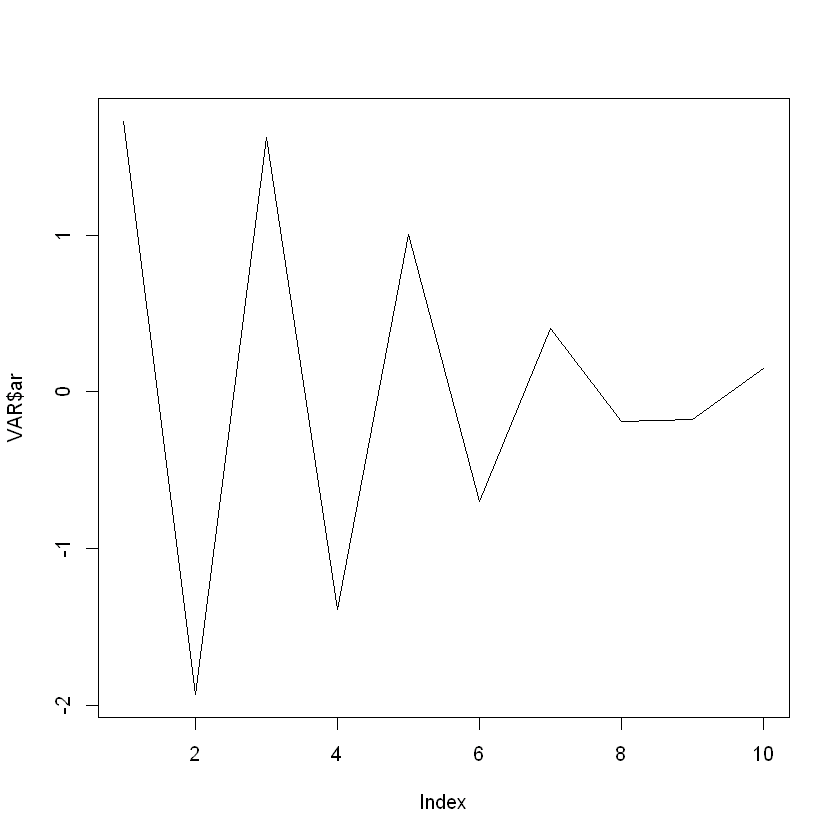

In [34]:
require("vars")
require("forecast")

arma.sim <- arima.sim(model=list(ar=c(1.0,-0.5),ma=c(0.75)),n=100) 
#arima(arma.sim, order=c(2,0,1))

VAR <- auto.arima(arma.sim, aic=F,demean=F, intercept=T, order=10) 
VAR
plot(VAR$ar, type='l')